## About

...

<!-- This page showcases the work of [Tuo Wang](https://tuowang.rbind.io/) that introduces packages to make [`ggplot2`](https://ggplot2.tidyverse.org/) plots more beautiful. You can find the original [R](https://www.r-graph-gallery.com/) code on Tuo's blog [here](https://tuowang.rbind.io/post/2021-03-25-ggplot2-extensions/). 

Thanks to him for accepting sharing his work here! Thanks also to [Tomás Capretto](https://tcapretto.netlify.app/) who translated this work from R to Python! 🙏🙏 -->

## Load libraries

<!-- The first step is always to import some libraries. `NumPy` is going to be used to make some computations with arrays and `load_penguins()` is imported from the `palmerpenguins` library to have access to the popular dataset. -->

...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.lines import Line2D

## Load and prepare the data

...

In [2]:
data = pd.read_csv("hike_data.csv")

In [3]:
# 1) Extract 'region' (entry before "--" of location data)
data["region"] = data["location"].str.split("--", n = 1, expand = True)[0]
data["region"] = data["region"].str.strip()
data.head()

,name,location,length,gain,highpoint,rating,description,region
0,Lake Hills Greenbelt,Puget Sound and Islands -- Seattle-Tacoma Area,"2.3 miles, roundtrip",50,330.0,3.67,Hike through a pastoral area first settled and...,Puget Sound and Islands
1,Snow Lake,Snoqualmie Region -- Snoqualmie Pass,"7.2 miles, roundtrip",1800,4400.0,4.16,A relatively short and easy hike within a ston...,Snoqualmie Region
2,Skookum Flats,Mount Rainier Area -- Chinook Pass - Hwy 410,"7.8 miles, roundtrip",300,2550.0,3.68,Choose between a shorter or longer river walk ...,Mount Rainier Area
3,Teneriffe Falls,Snoqualmie Region -- North Bend Area,"5.6 miles, roundtrip",1585,2370.0,3.92,You'll work up a sweat on this easy to moderat...,Snoqualmie Region
4,Twin Falls,Snoqualmie Region -- North Bend Area,"2.6 miles, roundtrip",500,1000.0,4.14,"Visit a trio (yes, trio) of waterfalls just of...",Snoqualmie Region


In [4]:
# 2) Extract miles
data["length_num"] = data["length"].str.split(" ", n = 1, expand = True)[0].astype(float)
data.head()

,name,location,length,gain,highpoint,rating,description,region,length_num
0,Lake Hills Greenbelt,Puget Sound and Islands -- Seattle-Tacoma Area,"2.3 miles, roundtrip",50,330.0,3.67,Hike through a pastoral area first settled and...,Puget Sound and Islands,2.3
1,Snow Lake,Snoqualmie Region -- Snoqualmie Pass,"7.2 miles, roundtrip",1800,4400.0,4.16,A relatively short and easy hike within a ston...,Snoqualmie Region,7.2
2,Skookum Flats,Mount Rainier Area -- Chinook Pass - Hwy 410,"7.8 miles, roundtrip",300,2550.0,3.68,Choose between a shorter or longer river walk ...,Mount Rainier Area,7.8
3,Teneriffe Falls,Snoqualmie Region -- North Bend Area,"5.6 miles, roundtrip",1585,2370.0,3.92,You'll work up a sweat on this easy to moderat...,Snoqualmie Region,5.6
4,Twin Falls,Snoqualmie Region -- North Bend Area,"2.6 miles, roundtrip",500,1000.0,4.14,"Visit a trio (yes, trio) of waterfalls just of...",Snoqualmie Region,2.6


In [5]:
data["trackNr"] = data.index
data.head()

,name,location,length,gain,highpoint,rating,description,region,length_num,trackNr
0,Lake Hills Greenbelt,Puget Sound and Islands -- Seattle-Tacoma Area,"2.3 miles, roundtrip",50,330.0,3.67,Hike through a pastoral area first settled and...,Puget Sound and Islands,2.3,0
1,Snow Lake,Snoqualmie Region -- Snoqualmie Pass,"7.2 miles, roundtrip",1800,4400.0,4.16,A relatively short and easy hike within a ston...,Snoqualmie Region,7.2,1
2,Skookum Flats,Mount Rainier Area -- Chinook Pass - Hwy 410,"7.8 miles, roundtrip",300,2550.0,3.68,Choose between a shorter or longer river walk ...,Mount Rainier Area,7.8,2
3,Teneriffe Falls,Snoqualmie Region -- North Bend Area,"5.6 miles, roundtrip",1585,2370.0,3.92,You'll work up a sweat on this easy to moderat...,Snoqualmie Region,5.6,3
4,Twin Falls,Snoqualmie Region -- North Bend Area,"2.6 miles, roundtrip",500,1000.0,4.14,"Visit a trio (yes, trio) of waterfalls just of...",Snoqualmie Region,2.6,4


In [6]:
# 4) Calculate cummulative length, mean(gain)
summary_stats = data.groupby(["region"]).agg(
    sum_length = ("length_num", "sum"),
    mean_gain = ("gain", "mean")
).reset_index()


summary_stats["mean_gain"] = summary_stats["mean_gain"].round(0)
summary_stats.head()

,region,sum_length,mean_gain
0,Central Cascades,2130.85,2260.0
1,Central Washington,453.30,814.0
2,Eastern Washington,1333.64,1591.0
3,Issaquah Alps,383.11,973.0
4,Mount Rainier Area,1601.80,1874.0


In [7]:
# 5) Cummulative nr of tracks per region.
trackNrs = data.groupby("region").size().to_frame('n').reset_index()
trackNrs.head()

,region,n
0,Central Cascades,226
1,Central Washington,80
2,Eastern Washington,143
3,Issaquah Alps,77
4,Mount Rainier Area,196


In [8]:
# 6) join nr of tracks back to summary_stats
summary_all = pd.merge(summary_stats, trackNrs, "left", on = "region")
summary_all.head()

,region,sum_length,mean_gain,n
0,Central Cascades,2130.85,2260.0,226
1,Central Washington,453.30,814.0,80
2,Eastern Washington,1333.64,1591.0,143
3,Issaquah Alps,383.11,973.0,77
4,Mount Rainier Area,1601.80,1874.0,196


In [9]:
summary_all_sorted = summary_all.sort_values("sum_length", ascending=False)

ANGLES = np.linspace(0, 2 * np.pi, len(summary_all_sorted), endpoint=False)
HEIGHTS = summary_all_sorted["sum_length"].values

## Basic radar plot

As usually, colors and other important values are declared before the code that actually produces the plot.

Radar charts plot data points in a circular layout. Instead of horizontal and vertical axes, it has an **angular** and a **radial** axis for **x** and **y**, respectively. In this world, **x** values are given by **angles** and **y** values are a **distance** from the center of the circle.

For today's visualization, **x** axis represents the variables, and **y** axis their scaled mean. The locations for **x**, given in angles, should be manually calculated and passed to matplotlib. That is what is going on in `n / VARIABLES_N * 2 * np.pi` in the list comprehension above. The **y** values are already given in the data frame.

Want to see how it looks like? Let's do it!

In [10]:
summary_all_sorted

,region,sum_length,mean_gain,n
5,North Cascades,3346.53,2500.0,301
0,Central Cascades,2130.85,2260.0,226
8,Snoqualmie Region,1915.32,2206.0,219
6,Olympic Peninsula,1699.91,1572.0,209
9,South Cascades,1630.32,1649.0,193
4,Mount Rainier Area,1601.80,1874.0,196
2,Eastern Washington,1333.64,1591.0,143
10,Southwest Washington,825.02,1185.0,123
7,Puget Sound and Islands,810.34,452.0,191
1,Central Washington,453.30,814.0,80


In [11]:
import matplotlib as mpl

COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

cmap = mpl.colors.LinearSegmentedColormap.from_list('color', COLORS, N=256)
norm = mpl.colors.Normalize(vmin=summary_all_sorted["n"].min(), vmax=summary_all_sorted["n"].max())

COLORS_ = cmap(norm(summary_all_sorted["n"].values))

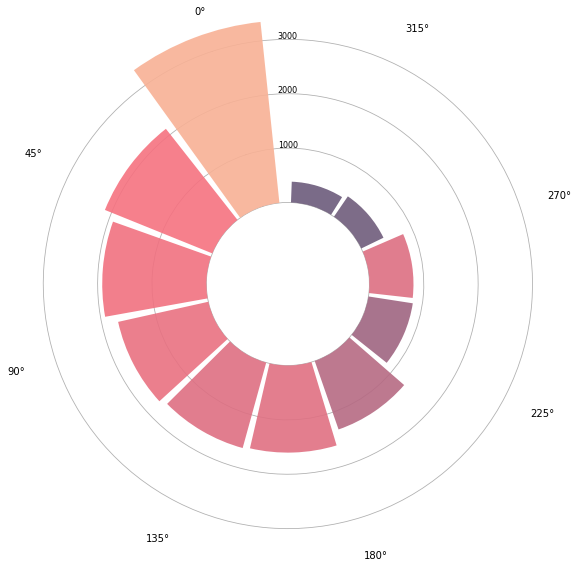

In [12]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, polar=True)

summary_all_sorted = summary_all.sort_values("sum_length", ascending=False)

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(summary_all_sorted), endpoint=False)
HEIGHTS = summary_all_sorted["sum_length"].values

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 3500)

ax.bar(ANGLES, HEIGHTS, color=COLORS_, alpha=0.9, width=0.52, zorder=10)

# Remove lines for radial axis (y)
ax.set_yticks([0, 1000, 2000, 3000])
ax.set_yticklabels([])
ax.xaxis.grid(False)

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

PAD = 10
ax.text(-0.2 * np.pi / 2, 1000 + PAD, "1000", ha ="center", size=8)
ax.text(-0.2 * np.pi / 2, 2000 + PAD, "2000", ha ="center",size=8)
ax.text(-0.2 * np.pi / 2, 3000 + PAD, "3000", ha ="center",size=8);